# What factors most affect happiness?

Gapminder took a global poll where participants were asked where, on a scale of 1 being the worst possible life and 10 being the best possible life, where they felt they personally landed at the time of asking. These responses were ranked by year and by national average response score.

The responses intrigued me, as some nations ranked higher than others, and wanted to see what correlations happiness had against other metrics. I will analyze the data against the following three other Gapminder data sets, as I want to see which of the following factors has the biggest effect on happiness.

### Income - Mean household income
### Life expectancy - the average number of years a newborn child would live
### Gini - inequality coefficient (higher meaning more inequality)


First, we will import and look at our raw data sets. Also, because the happiness index started being measured in 2004, and the other data sets go back much further, we will have to clean our supplemental data sets to only include data from 2004 - 2020.

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

happiness = pd.read_csv('happiness.csv', sep = ',')
incomeraw = pd.read_csv('income.csv', sep = ',')
lifeexpectancyraw = pd.read_csv('life_expectancy.csv', sep = ',')
giniraw = pd.read_csv('gini.csv', sep = ',')


UsageError: Line magic function `%` not found.


#### Data cleanup 1:
Data cleanup will first be demonstrated below through cleaning GINI data from raw gini data to a dataframe 'gini' with the exact range we need. Again, the time frames for the data sets are different, so we want to narrow down only 2004-2020 for each.

The rest of the data sets will be prepared the same way. This is essentially preparing our data sets so they match length 
horizontally.

In [238]:
giniraw.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


In [239]:
gini = giniraw.iloc[:, np.r_[0, 206:223]]
income = incomeraw.iloc[:, np.r_[0, 206:223]]
lifeexpectancy = lifeexpectancyraw.iloc[:, np.r_[0, 206:223]]
gini.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,38.3,39.0
1,Angola,46.0,44.9,43.8,42.7,43.5,44.3,45.1,46.0,46.8,47.7,48.5,49.4,50.3,51.3,51.3,52.1,53.0
2,Albania,30.6,30.4,30.2,30.0,29.7,29.5,29.2,29.0,31.6,34.6,32.9,33.7,33.2,33.2,33.2,33.8,34.5
3,Andorra,35.6,35.5,35.4,35.5,35.5,35.7,35.5,35.5,35.4,35.4,35.3,35.2,35.2,35.1,35.0,35.0,35.0
4,United Arab Emirates,32.0,31.8,32.1,32.3,32.6,32.7,32.6,32.6,32.5,31.1,29.7,28.4,27.2,26.0,26.0,26.0,26.7


In [240]:
"""

In the cell below, I have code commented out to rename each individual year to 
include the data point in front of it. Notice, that happiness(and life expectancy) 
does have some blank NotaNumber values. We do not necessarily want to fill these in quite yet, 
as if we are making line graphs etc. it may affect the visualization with random spikes.
in case we wanted to add the data type in front of each year:

# gini.columns = 'g' + gini.columns
# gini.columns.values[0] = 'country' #taking the 'g' off of country
#income.columns = 'i' + income.columns
#income.columns.values[0] = 'country'
#lifeexpectancy.columns = 'le' + lifeexpectancy.columns
#lifeexpectancy.columns.values[0] = 'country'
#happiness.columns = 'h' + happiness.columns
#happiness.columns.values[0] = 'country'
"""

"\n\nIn the cell below, I have code commented out to rename each individual year to \ninclude the data point in front of it. Notice, that happiness(and life expectancy) \ndoes have some blank NotaNumber values. We do not necessarily want to fill these in quite yet, \nas if we are making line graphs etc. it may affect the visualization with random spikes.\nin case we wanted to add the data type in front of each year:\n\n# gini.columns = 'g' + gini.columns\n# gini.columns.values[0] = 'country' #taking the 'g' off of country\n#income.columns = 'i' + income.columns\n#income.columns.values[0] = 'country'\n#lifeexpectancy.columns = 'le' + lifeexpectancy.columns\n#lifeexpectancy.columns.values[0] = 'country'\n#happiness.columns = 'h' + happiness.columns\n#happiness.columns.values[0] = 'country'\n"

#### Data cleanup 2
Now that all of our data sets match horizontally, I notice 2 things:

A. Some data sets have more countries than others

B. There are a lot of countries in this list.

For the sake of the scope of this experiment, we'll be condensing the data down to look at 5 countries in different regions around the world:
The United States,
Poland (where I am from),
Japan,
Saudi Arabia,
and Brazil.

First I will make a list of our countries and use it to strip the remainder from our data sets. We'll make new, abbreviated dataframes that contain these smaller lists for combining. I'll also be adding a column called 'dataset' so we know where each row is coming from. After this step, all of our data values will have the same height and width for merging.

In [241]:
happiness.loc[happiness['country'] == 'Albania']

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.0


In [247]:
values=["United States","Poland","Japan","Saudi Arabia","Brazil"]

In [248]:
h = (happiness.loc[happiness['country'].isin(values)]).copy()
h_datatype = np.repeat('Happiness',h.shape[0])
h['datatype'] = h_datatype
h = h.reset_index(drop=True)
h.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,datatype
0,Brazil,66.4,NaN,63.2,66.9,70.0,68.4,70.4,66.6,71.4,69.8,65.5,63.8,63.3,61.9,64.5,61.1,62.9,Happiness
1,Japan,65.2,NaN,62.4,59.1,58.5,60.6,62.6,59.7,59.6,59.2,58.8,59.5,59.1,57.9,59.1,61.2,60.4,Happiness
2,Poland,55.9,NaN,58.9,NaN,57.7,58.9,56.5,58.8,57.5,57.5,60.1,61.6,62.0,61.1,62.4,61.4,61.2,Happiness
3,Saudi Arabia,70.8,NaN,72.7,68.1,61.5,63.1,67.0,64.0,65.0,62.8,63.5,64.7,62.9,63.6,65.6,65.6,65.2,Happiness
4,United States,NaN,71.8,75.1,72.8,71.6,71.6,71.2,70.3,72.5,71.5,68.6,68.0,69.9,68.8,69.4,70.3,69.8,Happiness


In [262]:
#same procedure as above for the rest of the datasets
l = (lifeexpectancy.loc[lifeexpectancy['country'].isin(values)]).copy()
l_datatype = np.repeat('Life Expectancy',l.shape[0])
l['datatype'] = l_datatype
l = l.reset_index(drop=True)

g = (gini.loc[gini['country'].isin(values)]).copy()
g_datatype = np.repeat('GINI',g.shape[0])
g['datatype'] = g_datatype
g = g.reset_index(drop=True)

i = (income.loc[income['country'].isin(values)]).copy()
i_datatype = np.repeat('Income',i.shape[0])
i['datatype'] = i_datatype
i = i.reset_index(drop=True)

### Appending Data
Now, we will combine the dataframes into one, and exporting it as a new CSV file



In [269]:
combined_data = pd.concat([h,i,l,g])
combined_data = combined_data.reset_index(drop=True)
cd = combined_data
cd.to_csv('sorted_gapminder_data.csv', index=False)
cd.head(20)


,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,datatype
0,Brazil,66.4,NaN,63.2,66.9,70.0,68.4,70.4,66.6,71.4,69.8,65.5,63.8,63.3,61.9,64.5,61.1,62.9,Happiness
1,Japan,65.2,NaN,62.4,59.1,58.5,60.6,62.6,59.7,59.6,59.2,58.8,59.5,59.1,57.9,59.1,61.2,60.4,Happiness
2,Poland,55.9,NaN,58.9,NaN,57.7,58.9,56.5,58.8,57.5,57.5,60.1,61.6,62.0,61.1,62.4,61.4,61.2,Happiness
3,Saudi Arabia,70.8,NaN,72.7,68.1,61.5,63.1,67.0,64.0,65.0,62.8,63.5,64.7,62.9,63.6,65.6,65.6,65.2,Happiness
4,United States,NaN,71.8,75.1,72.8,71.6,71.6,71.2,70.3,72.5,71.5,68.6,68.0,69.9,68.8,69.4,70.3,69.8,Happiness
5,Brazil,4580,4950,5110,5410,5540,5720,5910,6370,6670,6760,6330,6040,5780,5830,5910,5980,6050,Income
6,Japan,14.3k,14.5k,14.7k,14.5k,14.4k,13.6k,14.2k,14.2k,14.4k,14.7k,14.8k,15k,15.2k,15.3k,15.5k,15.6k,15.8k,Income
7,Poland,5090,5860,6430,6900,7020,7110,7100,7060,7190,7350,7590,7890,8110,8380,8630,8890,9150,Income
8,Saudi Arabia,9860,10.6k,11.7k,12.8k,13.6k,13.7k,13.5k,14.7k,14.7k,15.2k,15.8k,15.8k,15.7k,15.6k,15.6k,15.5k,15.5k,Income
9,United States,23.3k,23.5k,23.8k,23.4k,23.1k,22.8k,22.9k,22.9k,23k,23.2k,23.6k,24.1k,24.3k,24.7k,25k,25.3k,25.8k,Income


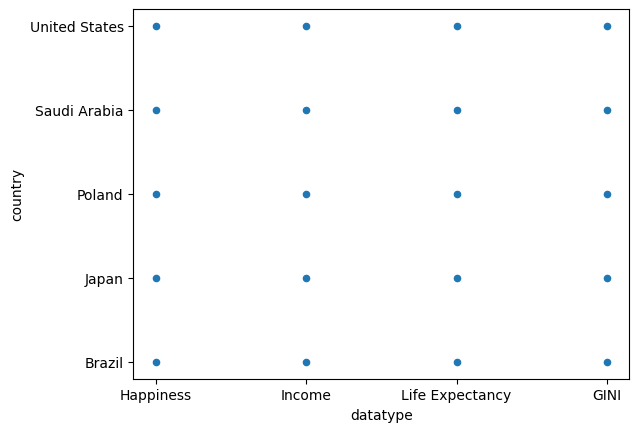

In [266]:
cd.plot(x='datatype', y='country', kind="scatter");